# NLP homework (Naive Bayes, Logistic Regression, Fasttext)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## loading data 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
train_df = pd.read_csv('text_data_all.csv')
test_df = pd.read_csv('text_data_all_test.csv')

train_df.columns = ['POST', 'label_type']
test_df.columns = ['POST', 'label_type']

In [4]:
train_df = train_df.sample(frac=1).reset_index(drop = True)
test_df = test_df.sample(frac=1).reset_index(drop = True)

val_size = 0.15
val_count = int(len(train_df)*0.15)

val_df = train_df.iloc[-val_count:].reset_index(drop = True)
train_df = train_df.iloc[:-val_count].reset_index(drop = True)

In [5]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(43935, 2)
(7753, 2)
(10337, 2)


In [6]:
class_mapping = {
    'cv': 0,
    'email' : 1,
    'invoice' : 2,
    'letter' : 3, 
    'memorandum' : 4,
    'newspaper' : 5,
    'publication' : 6,
    'report' : 7,
    'specification' : 8,
    'survey' : 9,
}

# Perform EDA

In [7]:
def add_label(val):
    return class_mapping[val]


train_df['LABEL'] = train_df['label_type'].apply(add_label)
val_df['LABEL'] = val_df['label_type'].apply(add_label)
test_df['LABEL'] = test_df['label_type'].apply(add_label)

In [8]:
train_df

,POST,label_type,LABEL
0,flebavg 97/28/94 Report gecg4632 J. Gidean oe...,report,7
1,MARLEORO BENSON SMEDGES MERT VRGNU SLMS AARUAM...,letter,3
2,ia Morris Inc. Policy or Bond Sym. WEE WER ...,invoice,2
3,AMERICAN CANCER SOCIETY 2) Porgy [Division No....,survey,9
4,KUT PIN. LEE STATISTICS AND COMPUTING LTD. 2...,letter,3
...,...,...,...
43930,"2 Taft Court Focteia, Marviand 20850 (Gon) 2o...",letter,3
43931,ig MATERIAL TESTED Seater et > uaa trae GRAI...,report,7
43932," BOIOANI TYNISTHO evnos §, 2058118598. ape...",invoice,2
43933,. *Aeae CRC Contract Research Center evaniea...,invoice,2


Perform data exploration and make some plots.

In [9]:
def count_plot(data,
               column,
               palette="rocket",
               figsize=(10, 5),
               ax=None):
    
    plt.figure(figsize=figsize)  # size of figure
    ax = sns.countplot(ax=ax, y=column, palette=palette, data=data,
                       order=data[column].value_counts().index)

    for index, value in enumerate(data[column].value_counts(ascending=False)):
        ax.text(value, index, str(value))
    ax.set_title('Distribution of '+column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.get_xaxis().set_visible(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
#     ax.axis('off')

### Distribution of train data

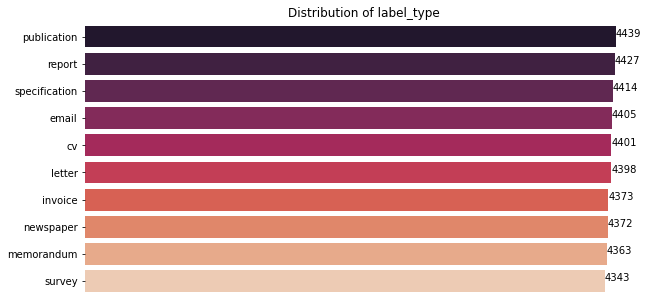

In [10]:
count_plot(train_df,'label_type')

### Distribution of validation data

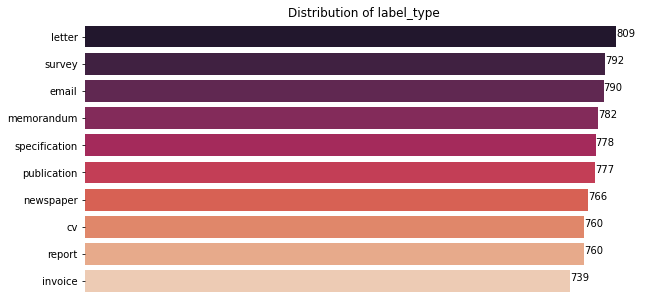

In [11]:
count_plot(val_df,'label_type')

### Distribution of test data

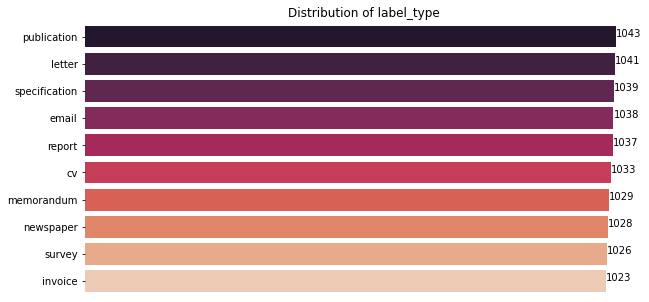

In [12]:
count_plot(test_df,'label_type')

### Distribution of length of texts and words

In [13]:
train_df['text_len'] = train_df['POST'].apply(len)
train_df['number_of_words'] = train_df['POST'].apply(lambda x: len(x.split()))
train_df

,POST,label_type,LABEL,text_len,number_of_words
0,flebavg 97/28/94 Report gecg4632 J. Gidean oe...,report,7,474,80
1,MARLEORO BENSON SMEDGES MERT VRGNU SLMS AARUAM...,letter,3,807,123
2,ia Morris Inc. Policy or Bond Sym. WEE WER ...,invoice,2,535,87
3,AMERICAN CANCER SOCIETY 2) Porgy [Division No....,survey,9,2465,421
4,KUT PIN. LEE STATISTICS AND COMPUTING LTD. 2...,letter,3,1724,302
...,...,...,...,...,...
43930,"2 Taft Court Focteia, Marviand 20850 (Gon) 2o...",letter,3,752,133
43931,ig MATERIAL TESTED Seater et > uaa trae GRAI...,report,7,127,25
43932," BOIOANI TYNISTHO evnos §, 2058118598. ape...",invoice,2,647,109
43933,. *Aeae CRC Contract Research Center evaniea...,invoice,2,518,83


In [14]:
def numeric_distplot(data,
                    column,
                    figsize=(20,8)):
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    for i in data.label_type.unique():
        sns.distplot(ax=axes[0],
                     a=data[data['label_type']==i][column],
                     hist=False,label=i)
    
    axes[0].legend()
    axes[0].set_title('Distribution of '+column+' by labels')

    sns.boxplot(data = data, y=column,x = 'label_type', ax=axes[1])
    axes[1].set_title('Boxplot of '+column+' by labels')
    
    sns.boxplot(data = data, y=column,x = 'label_type', ax=axes[1])
    

    axes[0].set_ylabel('Խտություն')
    
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)

    axes[1].set_xlabel('')
    
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].tick_params(axis='x', labelrotation=20)


### Distribution and boxplots for text lengths and number of words in each text

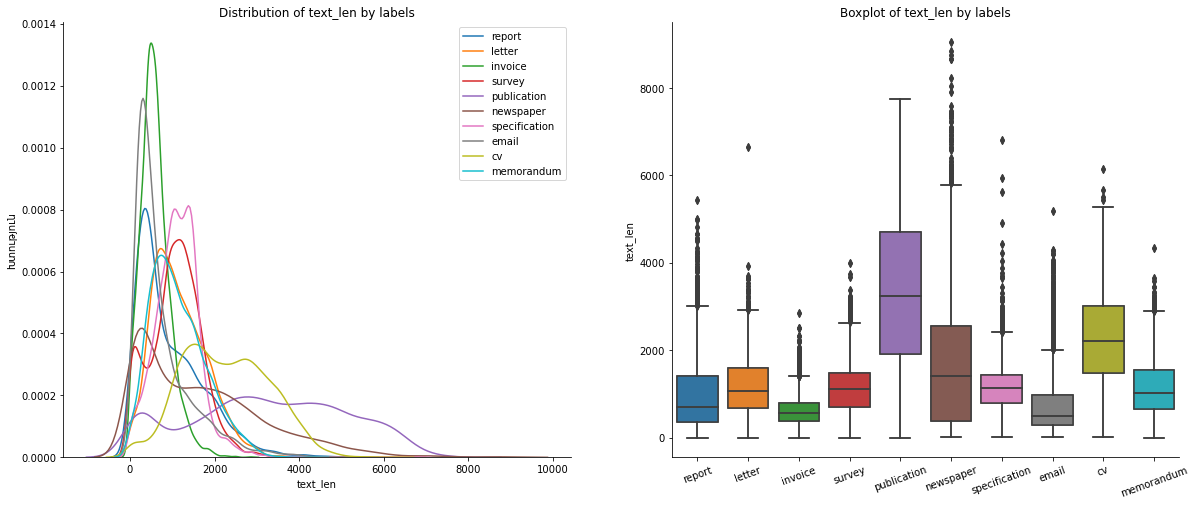

In [15]:
numeric_distplot(train_df,'text_len')

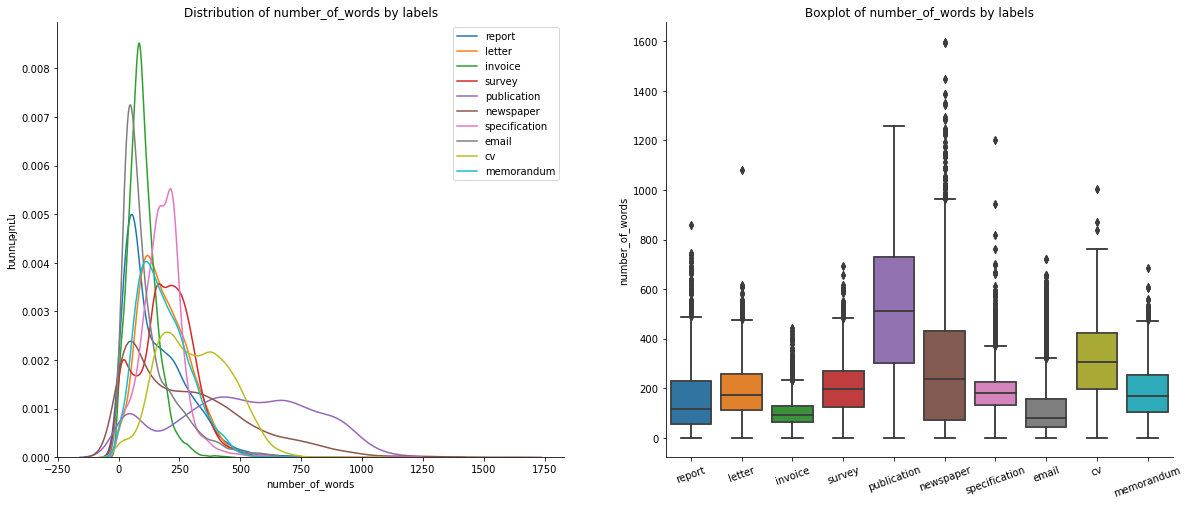

In [16]:
numeric_distplot(train_df,'number_of_words')

### WordCloud of each type

In [17]:
# !pip install wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
def make_wordcloud():
    
    fig, axes = plt.subplots(3, 3, figsize=(20,20))
    label_idx = 0
    for i in range(3):
        for j in range(3):
            label = train_df.label_type.unique()[label_idx]
            text = " ".join(train_df[train_df['label_type'] == label]['POST'])
            wordcloud = WordCloud(width=600, height=400, collocations=False,colormap="Dark2").generate(text)
            axes[i][j].imshow(wordcloud)
            axes[i][j].set_title(f"WordCloud of {label}")
            label_idx += 1

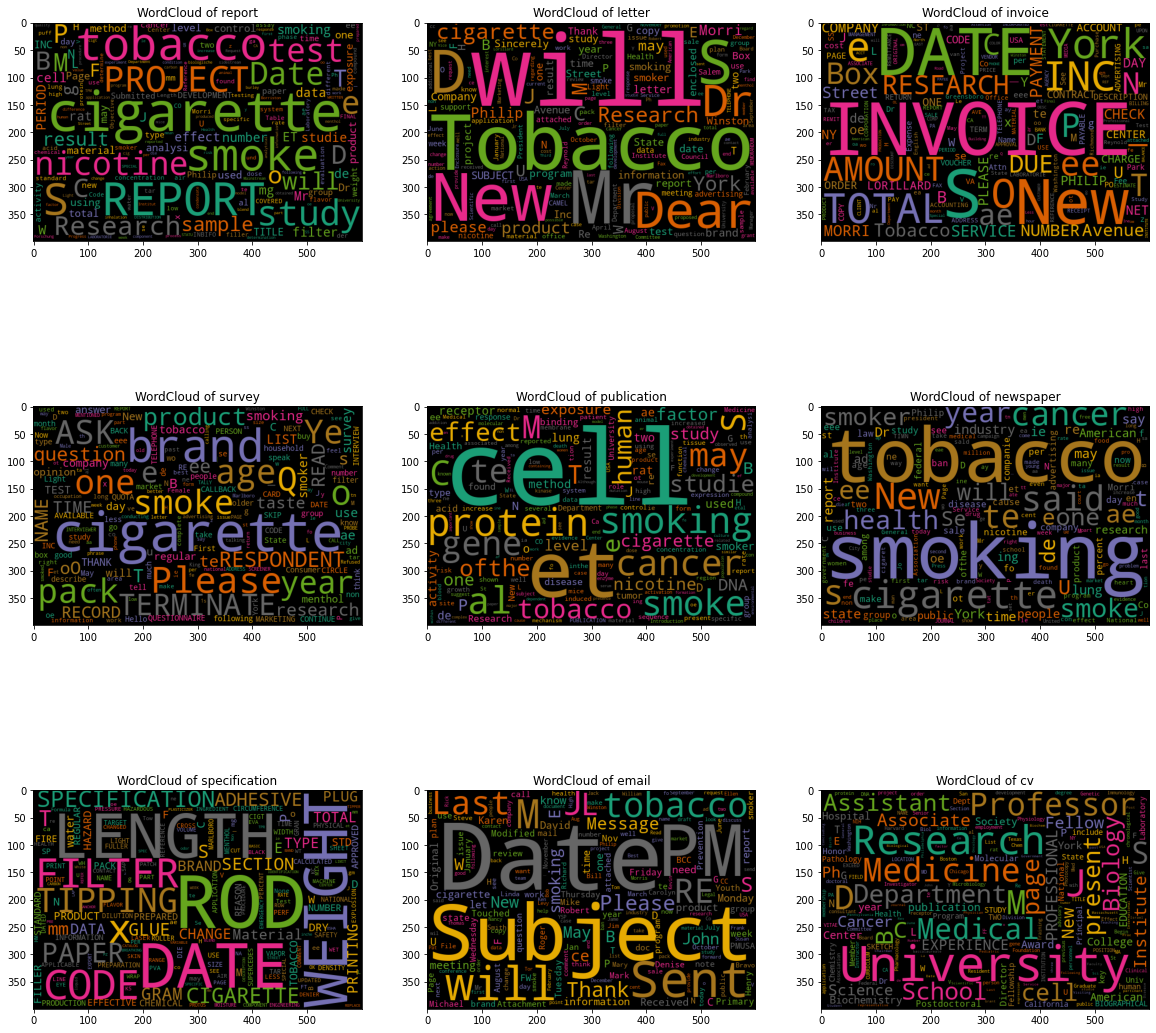

In [20]:
make_wordcloud()

# Preprocess 

Based on the EDA, decide which preprocessing steps you should use.

In [21]:
# sample from data

# list(train_df['POST'][np.random.randint(0,len(train_df),15)])

#### Conclution from this sample
- The data has already been lowercased
- Punctuation has already been removed from data
- `i`, `im`, `id` can be removed from text, because they are in each text, and aren't meaningfull for classification
- There are also other ***stopwords***, which must be removed for classification

### Normalize

In [22]:
import re
def normalize(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

train_df['POST'] = train_df['POST'].apply(normalize)
# list(train_df['POST'][np.random.randint(0,len(train_df),15)])

### Lemmatization

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

nltk_lemmatizer = WordNetLemmatizer()

def lematize_text(text):
    return ' '.join([nltk_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])

train_df['POST'] = train_df['POST'].apply(lematize_text)

[nltk_data] Downloading package punkt to /home/ml_user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ml_user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def remove_punctuation(text):
    text = ''.join([char if char.isalnum() or char == ' ' else ' ' for char in text])
    text = ' '.join(text.split())  # remove multiple whitespace
    text = text.lower()
    return text

train_df['POST'] = train_df['POST'].apply(remove_punctuation)

In [25]:
train_df

,POST,label_type,LABEL,text_len,number_of_words
0,flebavg 972894 report gecg4632 j gidean oer da...,report,7,474,80
1,marleoro benson smedges mert vrgnu slms aaruam...,letter,3,807,123
2,ia morris inc policy or bond sym wee wer cse i...,invoice,2,535,87
3,american cancer society 2 porgy division no ca...,survey,9,2465,421
4,kut pin lee statistics and computing ltd 25 ce...,letter,3,1724,302
...,...,...,...,...,...
43930,2 taft court focteia marviand 20850 gon 2oease...,letter,3,752,133
43931,ig material tested seater et uaa trae grains r...,report,7,127,25
43932,boioani tynistho evnos 2058118598 apenas pws p...,invoice,2,647,109
43933,aeae crc contract research center evanieaat ba...,invoice,2,518,83


In [26]:
# import nltk
# nltk.download('words')
# words = set(nltk.corpus.words.words())


# def remove_none_english_words(text):
#     text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
#          if w.lower() in words or not w.isalpha())
#     return text

# train_df['POST'] = train_df['POST'].apply(remove_none_english_words)

### Stopwords

In [27]:
stopwords = [
    'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there',
    'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they',
    'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such',
    'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am',
    'or', 'who', 'as', 'him', 'each', 'the', 'themselves', 'until',
    'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor',
    'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our',
    'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had',
    'all', 'no', 'at', 'any', 'before', 'them', 'same', 'and',
    'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that',
    'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'under',
    'you', 'herself', 'has', 'just', 'too', 'only', 'myself',
    'which', 'those', 'i', 'few', 'whom', 't', 'being', 'if', 'theirs',
    'my', 'against', 'a', 'by', 'doing', 'it', 'further', 'was', 'here', 'than'
]

In [28]:
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopswords = sorted(stopwords.words("english"))


def remove_stopwords(text):
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

train_df['POST'] = train_df['POST'].apply(remove_stopwords)

In [29]:
train_df

,POST,label_type,LABEL,text_len,number_of_words
0,flebavg 972894 report gecg4632 j gidean oer da...,report,7,474,80
1,marleoro benson smedges mert vrgnu slms aaruam...,letter,3,807,123
2,ia morris inc policy bond sym wee wer cse ise ...,invoice,2,535,87
3,american cancer society 2 porgy division cance...,survey,9,2465,421
4,kut pin lee statistics computing ltd 25 cedar ...,letter,3,1724,302
...,...,...,...,...,...
43930,2 taft court focteia marviand 20850 gon 2oease...,letter,3,752,133
43931,ig material tested seater et uaa trae grains r...,report,7,127,25
43932,boioani tynistho evnos 2058118598 apenas pws p...,invoice,2,647,109
43933,aeae crc contract research center evanieaat ba...,invoice,2,518,83


### Word Count

In [30]:
from collections import Counter

def word_counts(text, top_k=10, stopwords=None, only_alpha=False, min_len = 3):
    words = [word for word in text.split(' ') if (word != '') and (len(word)>=min_len)]
    if stopwords is not None:
        stopwords = {stopword.lower() for stopword in stopwords}
        words = [word for word in words if (word not in stopwords) and (len(word)>=min_len)]
    if only_alpha:
        words = [word for word in words if (word.isalpha()) and (len(word)>=min_len)]
    counts = Counter(words)
    return counts.most_common(top_k)

word_counts(' '.join(train_df['POST']))

[('from', 32619),
 ('cigarette', 24113),
 ('research', 23902),
 ('university', 23403),
 ('tobacco', 22152),
 ('new', 17911),
 ('date', 16378),
 ('cell', 15370),
 ('study', 14861),
 ('smoking', 14697)]

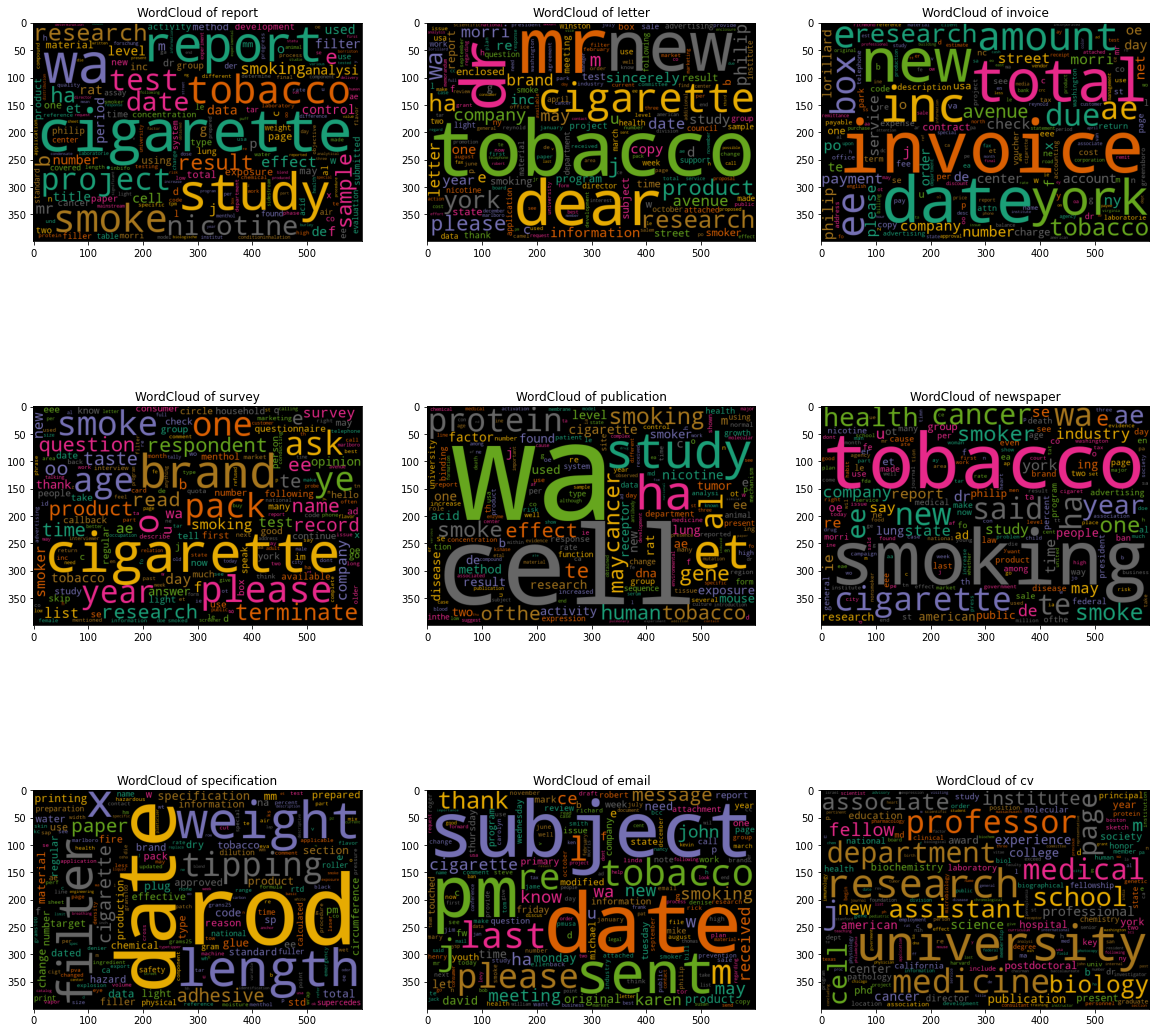

In [31]:
make_wordcloud()

# Modeling

### Same pre-processing for `val` and `text` data

In [32]:
for data in [val_df, test_df]:
    data['POST'] = data['POST'].apply(normalize)
    print("Complate   normalize")
    data['POST'] = data['POST'].apply(lematize_text)
    print("Complate   lematize_text")
    data['POST'] = data['POST'].apply(remove_stopwords)
    print("Complate   remove_stopwords")

    # data['POST'] = data['POST'].apply(remove_none_english_words)
    
    data['POST'] = data['POST'].apply(remove_punctuation)
    print("Complate   remove_punctuation")
    print('\n-----Complate-----\n')

Complate   normalize
Complate   lematize_text
Complate   remove_stopwords
Complate   remove_punctuation

-----Complate-----

Complate   normalize
Complate   lematize_text
Complate   remove_stopwords
Complate   remove_punctuation

-----Complate-----



### Count Vectorizer and TF-IDF

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer(token_pattern='\w+', lowercase=False)


from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer(token_pattern='\w+', lowercase=False)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train = np.array(train_df['POST'])
X_val = np.array(val_df['POST'])
y_train = np.array(train_df['LABEL'])
y_val = np.array(val_df['LABEL'])

### Models dataframe

In [35]:
models_df = pd.DataFrame(columns=['vectorization', 'clf',  'ngram', 'train_accuracy', 'val_accuracy'])
models_pipeline = {}

### Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

### count vectorizer + naive bayes

In [37]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', min_df=3)),
               ('clf', MultinomialNB()),])

start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')


models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Naive Bayes",
                              'ngram' : 1,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_nb'] = nb

run_time ----> 0.0 min, 3.492 sec
train accuracy 0.835
val accuracy 0.777


### count vectorizer with bigrams + naive bayes

In [38]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2), min_df=3)),
               ('clf', MultinomialNB()),])
start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Naive Bayes",
                              'ngram' : 2,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_nb_2ng'] = nb

run_time ----> 0.0 min, 10.851 sec
train accuracy 0.877
val accuracy 0.803


### count vectorizer with trigrams + naive bayes

In [39]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3), min_df=3)),
               ('clf', MultinomialNB()),])
start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Naive Bayes",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_nb_3ng'] = nb

run_time ----> 0.0 min, 18.796 sec
train accuracy 0.876
val accuracy 0.801


### tf-idf vectorizer + naive bayes

In [40]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', 
                                         min_df=3)),
               ('clf', MultinomialNB()),])
start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Naive Bayes",
                              'ngram' : 1,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_nb'] = nb

run_time ----> 0.0 min, 3.657 sec
train accuracy 0.834
val accuracy 0.777


### tf-idf vectorizer with bigrams + naive bayes

In [41]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2), 
                                         min_df=3)),
               ('clf', MultinomialNB()),])
start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Naive Bayes",
                              'ngram' : 2,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_nb_2ng'] = nb

run_time ----> 0.0 min, 11.181 sec
train accuracy 0.86
val accuracy 0.792


### tf-idf vectorizer with trigrams + naive bayes

In [42]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3), 
                                         min_df=3)),
               ('clf', MultinomialNB()),])
start_time = time.time()

nb.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Naive Bayes",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_nb_3ng'] = nb

run_time ----> 0.0 min, 19.181 sec
train accuracy 0.859
val accuracy 0.792


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

### count vectorizer + logistic regression

In [44]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = logreg.predict(X_val)
train_score = round(accuracy_score(logreg.predict(X_train), y_train),3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Logistic Regression",
                              'ngram' : 1,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_lr'] = nb

run_time ----> 0.0 min, 48.786 sec
train accuracy 0.989
val accuracy 0.841


### count vectorizer with bigrams + logistic regression

In [45]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2), 
                                                min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = logreg.predict(X_val)
train_score = round(accuracy_score(logreg.predict(X_train), y_train),3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Logistic Regression",
                              'ngram' : 2,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_lr_2ng'] = nb

run_time ----> 1.0 min, 16.566 sec
train accuracy 0.992
val accuracy 0.853


### count vectorizer with trigrams + logistic regression

In [46]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3), 
                                                min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = logreg.predict(X_val)
train_score = round(accuracy_score(logreg.predict(X_train), y_train),3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Count_Vect",
                              'clf' : "Logistic Regression",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['cv_lr_3ng'] = nb

run_time ----> 1.0 min, 26.713 sec
train accuracy 0.992
val accuracy 0.852


### tf-idf vectorizer + logistic regression

In [47]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+',
                                             min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Logistic Regression",
                              'ngram' : 1,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_lr'] = nb

run_time ----> 0.0 min, 12.134 sec
train accuracy 0.859
val accuracy 0.792


### tf-idf vectorizer with bigrams + logistic regression

In [48]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2), 
                                             min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Logistic Regression",
                              'ngram' : 2,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_lr_2ng'] = nb

run_time ----> 0.0 min, 23.263 sec
train accuracy 0.859
val accuracy 0.792


### tf-idf vectorizer with trigrams + logistic regression

In [49]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3), 
                                             min_df=3)),
                   ('clf', LogisticRegression(random_state=42, solver='liblinear')),])
start_time = time.time()

logreg.fit(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')

y_pred = nb.predict(X_val)
train_score = round(accuracy_score(nb.predict(X_train), y_train), 3)
val_score = round(accuracy_score(y_pred, y_val), 3)

print(f'train accuracy {train_score}')
print(f'val accuracy {val_score}')


models_df = models_df.append({'vectorization' : "TF IDF",
                              'clf' : "Logistic Regression",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['tf_lr_3ng'] = nb

run_time ----> 0.0 min, 32.984 sec
train accuracy 0.859
val accuracy 0.792


### fasttext

In [50]:
# !pip install fasttext

In [51]:

import fasttext

from fasttext import train_supervised

def to_fasttext_format(data: list, labels: list, save_path: bool=None):
    ft_data = []
    for d, l in zip(data, labels):
        ft_data.append("__label__{} {}".format(l, d))
    if save_path:
        np.savetxt(save_path, ft_data, fmt='%s')
    else:
        return ft_data
    
def train_fasttext(X_train, y_train, wordNgrams=1, minCount=1, ft_train_path="train_fasttext.txt", **kwargs):
    to_fasttext_format(X_train, y_train,save_path=ft_train_path)
    ft_model = train_supervised(ft_train_path, wordNgrams=wordNgrams,
                                minCount=minCount, epoch=30,
                                loss="softmax",  **kwargs)
    train_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_train))[0]]
    train_score = round(accuracy_score(train_preds, y_train), 3)
    print(f'train accuracy {train_score}')
    
    return ft_model, train_score

In [52]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')



val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Fasttext_word",
                              'clf' : "Fasttext",
                              'ngram' : 1,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_1'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread: 2791768 lr:  0.000000 avg.loss:  0.175847 ETA:   0h 0m 0s words/sec/thread: 2791943 lr: -0.000002 avg.loss:  0.175847 ETA:   0h 0m 0s


train accuracy 0.999
run_time ----> 0.0 min, 10.229 sec
val accuracy 0.839


### Fasttext + 2ngram

In [53]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train, wordNgrams=2)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')


val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')
models_df = models_df.append({'vectorization' : "Fasttext_word",
                              'clf' : "Fasttext",
                              'ngram' : 2,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_2'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread:  907211 lr:  0.000000 avg.loss:  0.247762 ETA:   0h 0m 0s100.0% words/sec/thread:  907229 lr: -0.000002 avg.loss:  0.247762 ETA:   0h 0m 0s


train accuracy 0.998
run_time ----> 0.0 min, 21.028 sec
val accuracy 0.849


### Fasttext + 3ngram

In [54]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train, wordNgrams=3)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')



val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')
models_df = models_df.append({'vectorization' : "Fasttext_word",
                              'clf' : "Fasttext",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_3'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread:  558057 lr:  0.000000 avg.loss:  0.330906 ETA:   0h 0m 0s


train accuracy 0.996
run_time ----> 0.0 min, 32.236 sec
val accuracy 0.841


### Fasttext + charngram 3

In [55]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train, minn=3, maxn=3)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')



val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Fasttext_char",
                              'clf' : "Fasttext",
                              'ngram' : 3,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_3_char'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread:  458006 lr:  0.000000 avg.loss:  0.420931 ETA:   0h 0m 0s


train accuracy 0.955
run_time ----> 0.0 min, 40.704 sec
val accuracy 0.844


### Fasttext + charngram 4

In [56]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train, minn=4, maxn=4)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')



val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Fasttext_char",
                              'clf' : "Fasttext",
                              'ngram' : 4,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_4_char'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread:  498026 lr:  0.000000 avg.loss:  0.350953 ETA:   0h 0m 0s


train accuracy 0.979
run_time ----> 0.0 min, 36.627 sec
val accuracy 0.851


### Fasttext + charngram 5

In [57]:
start_time = time.time()

ft_model, train_score = train_fasttext(X_train, y_train, minn=5, maxn=5)

end_time = time.time()

run_time_min = (end_time-start_time) // 60
run_time_sec = np.round((end_time-start_time) % 60,3)

print(f'run_time ----> {run_time_min} min, {run_time_sec} sec')



val_preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(X_val))[0]]
val_score = round(accuracy_score(val_preds, y_val), 3)

print(f'val accuracy {val_score}')

models_df = models_df.append({'vectorization' : "Fasttext_char",
                              'clf' : "Fasttext",
                              'ngram' : 5,
                              'train_accuracy' : train_score,
                              "val_accuracy" : val_score
                             },
                             ignore_index=True)

models_pipeline['fast_5_char'] = ft_model

Read 7M words
Number of words:  865476
Number of labels: 10
Progress: 100.0% words/sec/thread:  526418 lr:  0.000000 avg.loss:  0.319327 ETA:   0h 0m 0s


train accuracy 0.986
run_time ----> 0.0 min, 34.797 sec
val accuracy 0.855


### Model performance

In [58]:
models_df

,vectorization,clf,ngram,train_accuracy,val_accuracy
0,Count_Vect,Naive Bayes,1,0.835,0.777
1,Count_Vect,Naive Bayes,2,0.877,0.803
2,Count_Vect,Naive Bayes,3,0.876,0.801
3,TF IDF,Naive Bayes,1,0.834,0.777
4,TF IDF,Naive Bayes,2,0.860,0.792
5,TF IDF,Naive Bayes,3,0.859,0.792
6,Count_Vect,Logistic Regression,1,0.989,0.841
7,Count_Vect,Logistic Regression,2,0.992,0.853
8,Count_Vect,Logistic Regression,3,0.992,0.852
9,TF IDF,Logistic Regression,1,0.859,0.792


### For train data

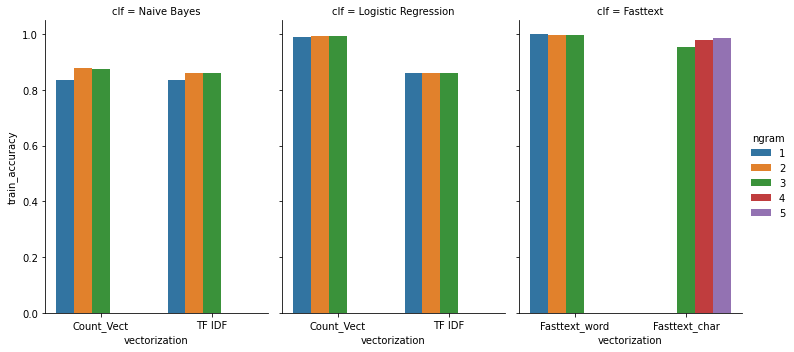

In [59]:
sns.catplot(x="vectorization", y="train_accuracy",
                hue="ngram", col="clf",
                data=models_df, kind="bar",sharex=False,
                height=5, aspect=0.7)
plt.show()

### For val data

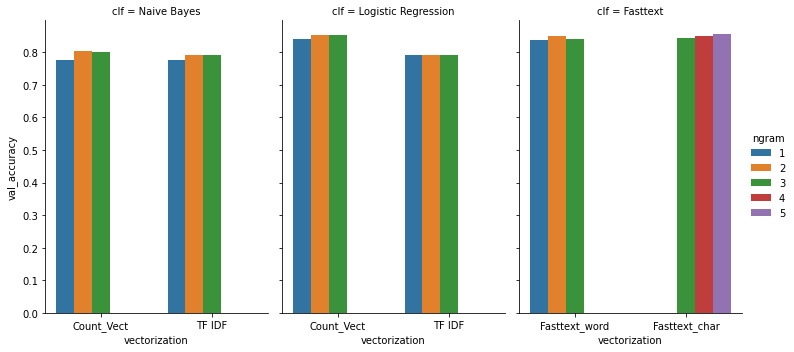

In [60]:
sns.catplot(x="vectorization", y="val_accuracy",
                hue="ngram", col="clf",
                data=models_df, kind="bar",sharex=False,
                height=5, aspect=0.7)
plt.show()

### Function for `Confusion matrix` vizualization

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def heatmap(actual, preds, x_y_label):
    cm = confusion_matrix(actual, preds)

    plt.figure(figsize = (10,10))
    ax = sns.heatmap(cm, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 30, fontsize = 10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 10)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(x_y_label)
    ax.yaxis.set_ticklabels(x_y_label)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Check results on Test Data

### From Naive Bayes

In [62]:
best_nv = np.argmax(models_df[models_df['clf'] == 'Naive Bayes']['val_accuracy'])
models_df[models_df['clf'] == 'Naive Bayes'].iloc[best_nv]

vectorization      Count_Vect
clf               Naive Bayes
ngram                       2
train_accuracy          0.877
val_accuracy            0.803
Name: 1, dtype: object

test accuracy 0.810

               precision    recall  f1-score   support

           cv       0.94      0.93      0.94      1033
        email       0.95      0.87      0.91      1038
      invoice       0.86      0.88      0.87      1023
       letter       0.70      0.73      0.72      1041
   memorandum       0.75      0.71      0.73      1029
    newspaper       0.60      0.90      0.72      1028
  publication       0.75      0.82      0.79      1043
       report       0.82      0.62      0.70      1037
specification       0.97      0.86      0.91      1039
       survey       0.90      0.78      0.84      1026

     accuracy                           0.81     10337
    macro avg       0.82      0.81      0.81     10337
 weighted avg       0.82      0.81      0.81     10337



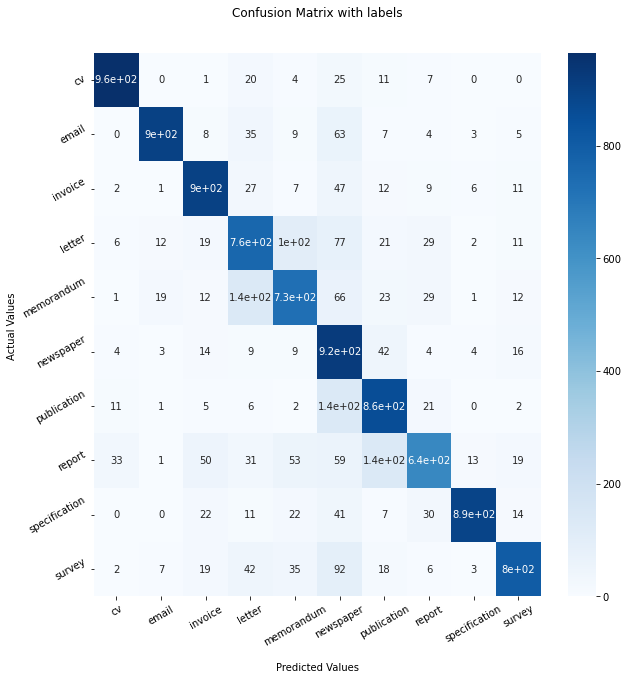

In [63]:
pred = models_pipeline['cv_nb_2ng'].predict(test_df['POST'])

test_score_nb = accuracy_score(pred, test_df["LABEL"])
print('test accuracy {0:,.3f}\n'.format(test_score_nb))

from sklearn.metrics import classification_report
print(classification_report(test_df["LABEL"], pred, target_names=class_mapping.keys()))

heatmap(actual = test_df["LABEL"],
        preds = pred,
        x_y_label = class_mapping.keys())

### From Log Reg

In [64]:
best_lr = np.argmax(models_df[models_df['clf'] == 'Logistic Regression']['val_accuracy'])
models_df[models_df['clf'] == 'Logistic Regression'].iloc[best_lr]

vectorization              Count_Vect
clf               Logistic Regression
ngram                               2
train_accuracy                  0.992
val_accuracy                    0.853
Name: 7, dtype: object

test accuracy 0.795

               precision    recall  f1-score   support

           cv       0.93      0.94      0.93      1033
        email       0.96      0.85      0.91      1038
      invoice       0.91      0.81      0.86      1023
       letter       0.72      0.71      0.71      1041
   memorandum       0.75      0.72      0.74      1029
    newspaper       0.57      0.89      0.70      1028
  publication       0.64      0.89      0.75      1043
       report       0.89      0.51      0.65      1037
specification       0.95      0.86      0.90      1039
       survey       0.92      0.75      0.83      1026

     accuracy                           0.79     10337
    macro avg       0.82      0.79      0.80     10337
 weighted avg       0.82      0.79      0.80     10337



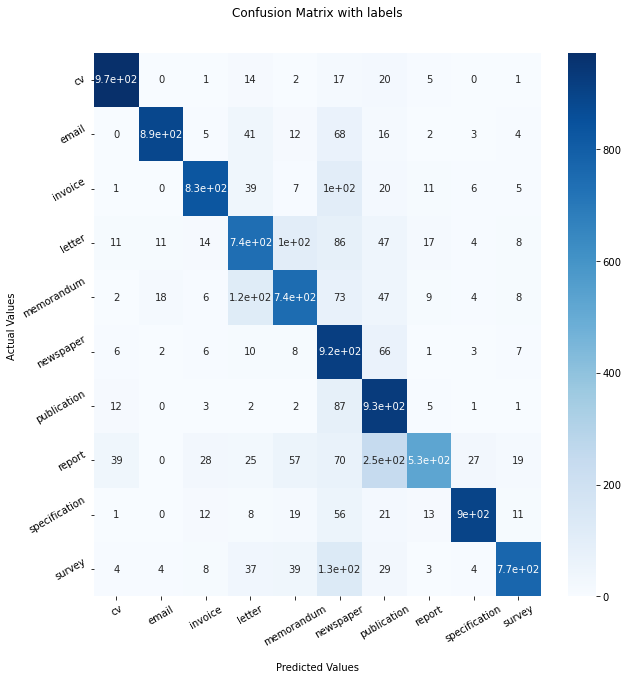

In [65]:
pred = models_pipeline['cv_lr_2ng'].predict(test_df['POST'])

test_score_lr = accuracy_score(pred,test_df["LABEL"])
print('test accuracy {0:,.3f}\n'.format(test_score_lr))

from sklearn.metrics import classification_report
print(classification_report(test_df["LABEL"], pred, target_names=class_mapping.keys()))

heatmap(actual = test_df["LABEL"],
        preds = pred,
        x_y_label = class_mapping.keys())

### From Fasttext

In [66]:
best_ft = np.argmax(models_df[models_df['clf'] == 'Fasttext']['val_accuracy'])
models_df[models_df['clf'] == 'Fasttext'].iloc[best_ft]

vectorization     Fasttext_char
clf                    Fasttext
ngram                         5
train_accuracy            0.986
val_accuracy              0.855
Name: 17, dtype: object

test accuracy 0.866

               precision    recall  f1-score   support

           cv       0.97      0.97      0.97      1033
        email       0.93      0.91      0.92      1038
      invoice       0.91      0.90      0.90      1023
       letter       0.82      0.80      0.81      1041
   memorandum       0.83      0.81      0.82      1029
    newspaper       0.77      0.86      0.81      1028
  publication       0.80      0.87      0.83      1043
       report       0.82      0.75      0.79      1037
specification       0.92      0.92      0.92      1039
       survey       0.91      0.87      0.89      1026

     accuracy                           0.87     10337
    macro avg       0.87      0.87      0.87     10337
 weighted avg       0.87      0.87      0.87     10337



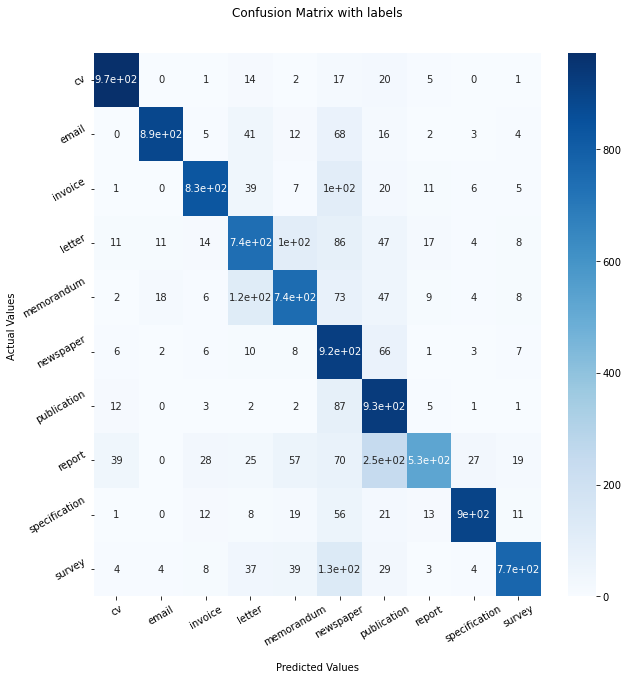

In [67]:
ftmodel = models_pipeline['fast_1']

preds = [int(i[0].split('_')[-1]) for i in ft_model.predict(list(test_df['POST']))[0]]

test_score_ft = accuracy_score(preds,test_df["LABEL"])
print('test accuracy {0:,.3f}\n'.format(test_score_ft))

from sklearn.metrics import classification_report
print(classification_report(test_df["LABEL"], preds, target_names= class_mapping.keys()))

heatmap(actual = test_df["LABEL"],
        preds = pred,
        x_y_label = class_mapping.keys())

### Save models

In [70]:
import joblib

joblib.dump(
    models_pipeline['cv_nb_2ng'],
    'nb_best_model.pkl'
    )

joblib.dump(
    models_pipeline['cv_lr_2ng'],
    'log_reg_best_model.pkl'
    )
print("")

In [69]:
models_pipeline['fast_5_char'].save_model("fastext_best_model.bin")
#  fasttext.load_model("fastext_best_model.bin")

### Thanks